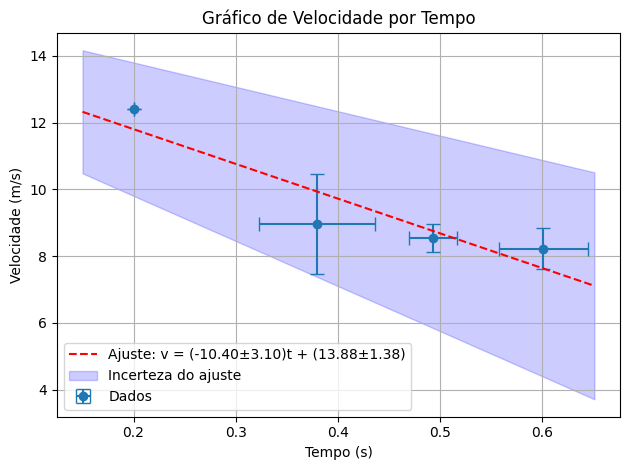

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados experimentais
alturas = np.array([1.24, 1.66, 2.10, 2.46])
tempos = np.array([
    [0.20, 0.20, 0.20],
    [0.30, 0.419, 0.42],
    [0.51, 0.51, 0.46],
    [0.544, 0.61, 0.65]
])

# Cálculo das velocidades individuais: v = 2h / t
velocidades = 2 * alturas[:, np.newaxis] / tempos

# Médias e desvios padrão
velocidades_medias = np.mean(velocidades, axis=1)
velocidades_std = np.std(velocidades, axis=1)
tempos_medios = np.mean(tempos, axis=1)
tempos_std = np.std(tempos, axis=1)

# Função de ajuste linear
def func(t, a, b):
    return a * t + b

# Ajuste dos dados
popt, pcov = curve_fit(func, tempos_medios, velocidades_medias)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

# Geração do gráfico
t_fit = np.linspace(min(tempos_medios) - 0.05, max(tempos_medios) + 0.05, 100)
v_fit = func(t_fit, *popt)

plt.errorbar(tempos_medios, velocidades_medias, xerr=tempos_std, yerr=velocidades_std, fmt='o', label='Dados', capsize=5)
plt.plot(t_fit, v_fit, 'r--', label=f'Ajuste: v = ({a:.2f}±{a_err:.2f})t + ({b:.2f}±{b_err:.2f})')
plt.fill_between(t_fit,
                 func(t_fit, a - a_err, b - b_err),
                 func(t_fit, a + a_err, b + b_err),
                 color='blue', alpha=0.2, label='Incerteza do ajuste')

plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Gráfico de Velocidade por Tempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
